In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.graphics as smgraph
import scipy.stats as stats

%matplotlib inline
plt.style.use("ggplot")


# read raw data
remote_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
# column names 
data_columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

data_df = pd.read_csv(remote_data, names=data_columns, sep="\s+", dtype=float)
data_df

C:\Users\y\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [2]:
# Check if there is any missing data in the df           
# according to the document, missing attributes are denoted as None            
# Replace the None with np.nan


for col in data_columns:
    data_df[col] = data_df[col].replace("None",np.nan)

data_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [3]:
# center all columns except for the Charles River dummy variable (column 'CHAS'), which is a binary value
cdf = data_df.copy()
for column in data_df.columns[0:3]:
    mean_ = np.nanmean(data_df[column])
    sd_   = np.nanstd(data_df[column])
    cdf[column] = (data_df[column] - mean_) / (sd_)

for column in data_df.columns[4:14]:
    mean_ = np.nanmean(data_df[column])
    sd_   = np.nanstd(data_df[column])
    cdf[column] = (data_df[column] - mean_) / (sd_)
    
# check if we accidentally touched column 'CHAS', if values in CHAS column are 1s and 0s, we shall be good  
print cdf['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64


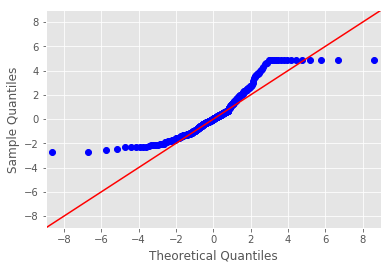

In [4]:
##  Test the normality of the MEDV distribution by using qq plot
##  We use QQ plot by testing MEDV values with T distribution as the median and std deviation of the population is unknown to us

probplot = sm.ProbPlot( data_df['MEDV'], stats.t, fit=True)
figure = probplot.qqplot(line='45')
plt.show()

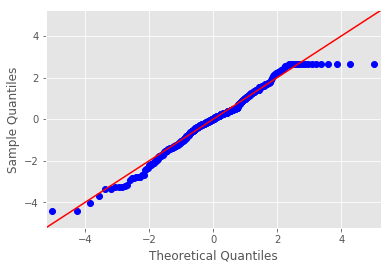

In [5]:
## we can see that the distribution basically match a normal distribution except for some outliers on sections in low theoretical quantiles
## and high theoretical quantiles
## we can take the log of  data_df['MEDV'] to stablize the variance
data_df['LOGMEDV'] = np.log(data_df['MEDV'])
data_df
## now test the normality of data_df['LOGMEDV']
probplot = sm.ProbPlot( data_df['LOGMEDV'], stats.t, fit=True)
figure = probplot.qqplot(line='45')
plt.show()

In [6]:
## It is clear that the data_df['LOGMEDV'] is normally distributed except for a few outlier in high theoretical quantiles
## now center the column data_df['LOGMEDV']
mean_ = np.nanmean(data_df['LOGMEDV'])
sd_   = np.nanstd(data_df['LOGMEDV'])
cdf['LOGMEDV'] = (data_df['LOGMEDV'] - mean_) / (sd_)

In [7]:
## we can start with testing each parameter with MEDV values in a regression model
## referred to lab4
print 'Model,  R^2,   AIC,   coef.,   p-value'
for param in cdf.columns[0:3]:
    form = 'LOGMEDV ~ ' + param
    
    model = smf.ols(form, cdf).fit()
    AIC   = model.aic
    R2    = model.rsquared
    coef  = model.params[param]
    p     = model.pvalues[param]
    
    print form,  R2, AIC, coef, p

for param in cdf.columns[4:13]:
    form = 'LOGMEDV ~ ' + param
    
    model = smf.ols(form, cdf).fit()
    AIC   = model.aic
    R2    = model.rsquared
    coef  = model.params[param]
    p     = model.pvalues[param]
    
    print form,  R2, AIC, coef, p

Model,  R^2,   AIC,   coef.,   p-value
LOGMEDV ~ CRIM 0.278727372474 1274.63632257 -0.527946372726 1.16623949515e-37
LOGMEDV ~ ZN 0.132019225028 1368.32342472 0.363344499103 3.08507936947e-17
LOGMEDV ~ INDUS 0.293283076737 1264.32050275 -0.541556162126 6.678599537e-40
LOGMEDV ~ NOX 0.260712661175 1287.1190777 -0.510600294923 6.03908579209e-35
LOGMEDV ~ RM 0.399450816964 1181.95096251 0.632021215597 8.76473965826e-58
LOGMEDV ~ AGE 0.205591247418 1323.50627848 -0.453421710351 5.03320414629e-27
LOGMEDV ~ DIS 0.117498346151 1376.71851984 0.342780317625 2.13590796606e-15
LOGMEDV ~ RAD 0.23229576653 1306.20432487 -0.481970711278 8.58160727013e-31
LOGMEDV ~ TAX 0.31524368767 1248.34751587 -0.561465660277 2.26164553974e-43
LOGMEDV ~ PTRATIO 0.251731597577 1293.22906507 -0.501728609486 1.28822559954e-33
LOGMEDV ~ B 0.161911124704 1350.59044499 0.402381814579 4.07976598227e-21
LOGMEDV ~ LSTAT 0.648079937421 911.524076198 -0.805034121899 2.22907587861e-116


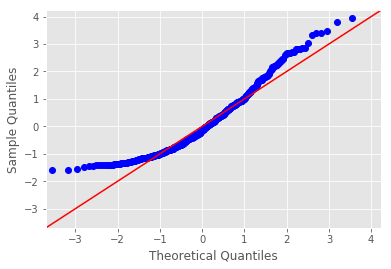

In [8]:
## we can see that LSTAT is a strong predictor with negative effect on LOGMEDV 

# Hypothesis 1:
# There exists a negative correlation between the median house value and the % lower status of the population
# The higher LSTAT is, the lower the median value (MEDV) of the properties is

## Verify normality of LSTAT distribution
probplot = sm.ProbPlot( data_df['LSTAT'], stats.t, fit=True)
figure = probplot.qqplot(line='45')
plt.show()

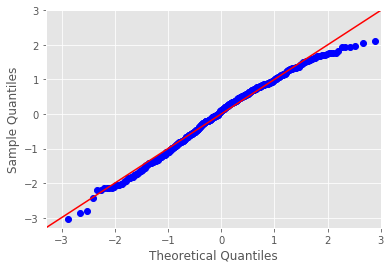

In [9]:
## we can take the log of  data_df['LSTAT'] to stablize the variance
data_df['LOGLSTAT'] = np.log(data_df['LSTAT'])

## now test the normality of data_df['LOGLSTAT']
probplot = sm.ProbPlot( data_df['LOGLSTAT'], stats.t, fit=True)
figure = probplot.qqplot(line='45')
plt.show()

## center the column data_df['LOGLSTAT']
mean_ = np.nanmean(data_df['LOGLSTAT'])
sd_   = np.nanstd(data_df['LOGLSTAT'])
cdf['LOGLSTAT'] = (data_df['LOGLSTAT'] - mean_) / (sd_)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.677    
Dependent Variable: LOGMEDV          AIC:                867.7212 
Date:               2017-06-19 21:41 BIC:                876.1743 
No. Observations:   506              Log-Likelihood:     -431.86  
Df Model:           1                F-statistic:        1058.    
Df Residuals:       504              Prob (F-statistic): 7.32e-126
R-squared:          0.677            Scale:              0.32402  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      0.0000    0.0253    0.0000  1.0000  -0.0497   0.0497
LOGLSTAT      -0.8230    0.0253  -32.5214  0.0000  -0.8727  -0.7732
------------------------------------------------------------------
Omnibus:               24.565       Durbin-Watson:          0.855 
Prob(Om

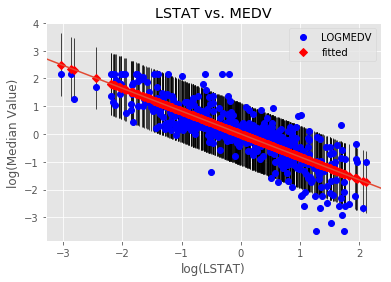

In [10]:
## Verify Hypothesis 1

model = smf.ols('LOGMEDV ~ LOGLSTAT', cdf).fit()
print model.summary2()

#referred to http://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_fit.html#statsmodels.graphics.regressionplots.plot_fit
fig = smgraph.regressionplots.plot_fit(model, 1)
ax_ = fig.axes[0]
ax_.set_ylabel("log(Median Value)")
ax_.set_xlabel("log(LSTAT)")
ax_.set_title("LSTAT vs. MEDV")
line = smgraph.regressionplots.abline_plot(model_results=model, ax=ax_)

In [11]:
## We can say that the hypothesis 1 is valid as:
## 1. Key GoF looks good: AIC and BIC is low, Log-Likelihood is high
## 2. the data distribution fits the regression model
## 3. the majority of LOGMEDV data points landed in the range of fitted value +/- resid

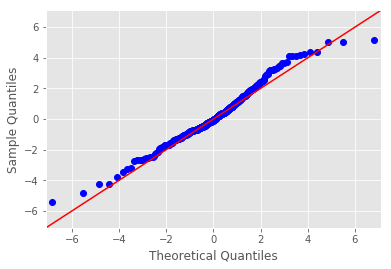

In [12]:
# Hypothesis 2:
# There exists positive coorelation between the median house value and the average number of rooms per dwelling (RM)
# The higher the average number of rooms per dwelling is, the higher the median value (MEDV) of the properties is

## Verify normality of RM distribution
probplot = sm.ProbPlot( data_df['RM'], stats.t, fit=True)
figure = probplot.qqplot(line='45')
plt.show()

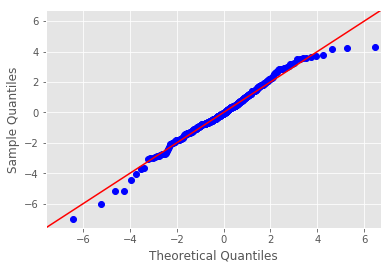

In [13]:
## we can take the log of  data_df['RM'] to stablize the variance
data_df['LOGRM'] = np.log(data_df['RM'])

## now test the normality of data_df['LOGLSTAT']
probplot = sm.ProbPlot( data_df['LOGRM'], stats.t, fit=True)
figure = probplot.qqplot(line='45')
plt.show()

## center the column data_df['LOGRM']
mean_ = np.nanmean(data_df['LOGRM'])
sd_   = np.nanstd(data_df['LOGRM'])
cdf['LOGRM'] = (data_df['LOGRM'] - mean_) / (sd_)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.371    
Dependent Variable: LOGMEDV          AIC:                1204.0560
Date:               2017-06-19 21:41 BIC:                1212.5090
No. Observations:   506              Log-Likelihood:     -600.03  
Df Model:           1                F-statistic:        299.4    
Df Residuals:       504              Prob (F-statistic): 5.48e-53 
R-squared:          0.373            Scale:              0.62986  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    0.0000     0.0353    0.0000   1.0000   -0.0693   0.0693
LOGRM        0.6104     0.0353   17.3020   0.0000    0.5411   0.6798
------------------------------------------------------------------
Omnibus:              80.550       Durbin-Watson:          0.571  
Pr

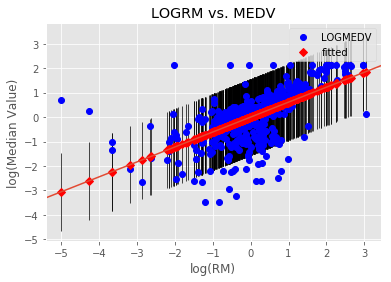

In [14]:
## Verify Hypothesis 2

model = smf.ols('LOGMEDV ~ LOGRM', cdf).fit()
print model.summary2()

#referred to http://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_fit.html#statsmodels.graphics.regressionplots.plot_fit
fig = smgraph.regressionplots.plot_fit(model, 1)
ax_ = fig.axes[0]
ax_.set_ylabel("log(Median Value)")
ax_.set_xlabel("log(RM)")
ax_.set_title("LOGRM vs. MEDV")
line = smgraph.regressionplots.abline_plot(model_results=model, ax=ax_)

In [15]:
# # Referred to http://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_fit.html

# y= cdf.loc[:,'MEDV']
# X = cdf[['AGE']]

# X["constant"] = 2
# model = sm.OLS(y, X)
# results = model.fit()

# fig, ax = plt.subplots()
# fig = sm.graphics.plot_fit(results, 0, ax=ax)
# ax.set_ylabel("Median Value")
# ax.set_xlabel("AGE")
# ax.set_title("Age vs. Median Value")
# plt.show()